In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_excel("daily1.xlsx")

In [3]:
df.columns

Index(['DATE', 'AL2O3', 'CAO', 'CR2O3', 'K2O', 'MGO', 'MNO', 'NA2O', 'P',
       'SIO2', 'TIO2', 'ASH', 'VM', 'MOISTURE', 'MAX_EXPANSION',
       'MAX_FLUIDITY', 'CSN', 'FLUE_TEMP', 'S_0P5MM', 'S_3P15MM', 'CT', 'CET',
       'ST', 'RT', 'CBT', 'TOTAL_HEAT', 'SO2', 'NOX', 'CO', 'CO2', 'Q_WATER',
       'Q_DURATION', 'CSR', 'CRI', 'AMS', 'M40'],
      dtype='object')

In [4]:
df.shape

(1000, 36)

In [5]:
df=df[['DATE', 'ASH', 'VM', 'MOISTURE', 'MAX_EXPANSION',
       'MAX_FLUIDITY', 'CSN', 'FLUE_TEMP', 'S_0P5MM', 'S_3P15MM', 'CT', 'CET',
       'ST','CBT','CSR']]

In [6]:
df.dropna(subset=['CSR'],inplace=True)

In [7]:
df.tail(45)

,DATE,ASH,VM,MOISTURE,MAX_EXPANSION,MAX_FLUIDITY,CSN,FLUE_TEMP,S_0P5MM,S_3P15MM,CT,CET,ST,CBT,CSR
953,2021-11-21,11.183333,24.163333,11.023333,37.0,1122.0,6.5,1148.338750,47.182333,86.261000,1277.123143,1023.126423,274.526969,1306.333333,67.026
954,2021-11-22,11.126667,23.433333,10.320000,38.0,804.0,7.0,1190.113333,44.191333,82.885667,1275.442804,1009.249883,274.183450,1305.000000,67.642
955,2021-11-23,11.033333,23.656667,10.473333,22.0,439.0,7.0,1176.939167,46.166333,85.741000,1271.306137,1005.697412,277.414720,1301.833333,66.183
956,2021-11-24,10.820000,23.745000,10.810000,28.0,1074.0,7.0,1173.233333,48.112000,86.000500,1276.678667,1013.952637,282.248366,1295.666667,67.707
957,2021-11-25,11.220000,23.430000,10.246667,29.0,2484.0,6.5,1210.441500,50.826667,87.124333,1262.441315,999.360364,280.843685,1289.166667,66.944
958,2021-11-26,10.780000,23.540000,10.386667,37.0,1536.0,7.0,1185.089167,48.277000,86.876000,1255.554247,907.110524,275.846947,1296.000000,66.669
959,2021-11-27,11.886667,23.396667,10.666667,34.0,2070.0,7.0,1193.255833,51.168000,88.138000,1257.097999,791.074607,275.156259,1306.583333,66.921
960,2021-11-28,11.330000,23.740000,9.700000,44.0,1560.0,7.0,1197.192500,48.807333,87.312333,1253.908900,772.756925,286.893045,1302.500000,67.489
961,2021-11-29,11.163333,23.436667,9.820000,37.0,810.0,6.5,1177.452500,51.108000,88.305000,1260.841498,792.712139,292.767932,1304.666667,69.300
962,2021-11-30,11.020000,23.570000,9.755000,40.0,942.0,6.5,1173.597500,50.923000,88.951500,1250.786161,723.929168,293.220675,1281.833333,69.200


In [8]:
df.shape

(921, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           921 non-null    datetime64[ns]
 1   ASH            915 non-null    float64       
 2   VM             915 non-null    float64       
 3   MOISTURE       917 non-null    float64       
 4   MAX_EXPANSION  712 non-null    float64       
 5   MAX_FLUIDITY   647 non-null    float64       
 6   CSN            715 non-null    float64       
 7   FLUE_TEMP      899 non-null    float64       
 8   S_0P5MM        914 non-null    float64       
 9   S_3P15MM       913 non-null    float64       
 10  CT             921 non-null    float64       
 11  CET            921 non-null    float64       
 12  ST             921 non-null    float64       
 13  CBT            920 non-null    float64       
 14  CSR            921 non-null    float64       
dtypes: datetime64[ns](1), f

In [10]:
df['DATE']= pd.to_datetime(df['DATE'])

In [11]:
print(df['DATE'].min())
print(df['DATE'].max())

2019-04-13 00:00:00
2022-01-05 00:00:00


In [12]:
df.describe()

,ASH,VM,MOISTURE,MAX_EXPANSION,MAX_FLUIDITY,CSN,FLUE_TEMP,S_0P5MM,S_3P15MM,CT,CET,ST,CBT,CSR
count,915.000000,915.000000,917.000000,712.000000,647.000000,715.000000,899.000000,914.000000,913.000000,921.000000,921.000000,921.000000,920.000000,921.000000
mean,12.536585,24.421580,10.450871,22.709270,591.047141,6.259091,1169.573546,50.475357,88.570208,1407.531059,1011.430570,284.037634,1282.867645,66.591180
std,1.123461,36.650774,0.593774,15.054253,541.940479,2.913690,86.755855,1.869636,1.885018,230.269181,40.372724,22.590082,43.794220,1.302853
min,10.035000,19.036667,7.100000,-15.000000,26.000000,4.000000,327.467917,43.498000,80.577600,1206.326005,672.630378,229.045408,859.350000,58.400000
25%,11.718333,22.704167,10.066667,12.000000,183.500000,5.500000,1138.814687,49.221750,87.218333,1291.859670,1009.975300,268.015066,1274.500000,65.700000
50%,12.665000,23.150000,10.400000,23.000000,390.000000,6.000000,1182.934167,50.467833,88.194667,1331.501592,1022.578987,281.841724,1294.541667,66.621000
75%,13.183333,23.688333,10.800000,34.000000,891.000000,6.500000,1204.233333,51.696167,89.843000,1409.725722,1030.127787,296.979585,1306.875000,67.414000
max,29.696667,1131.635000,14.583333,63.000000,4608.000000,82.000000,1342.266250,57.208000,93.705000,2294.838149,1054.870068,363.342519,1340.833333,70.300000


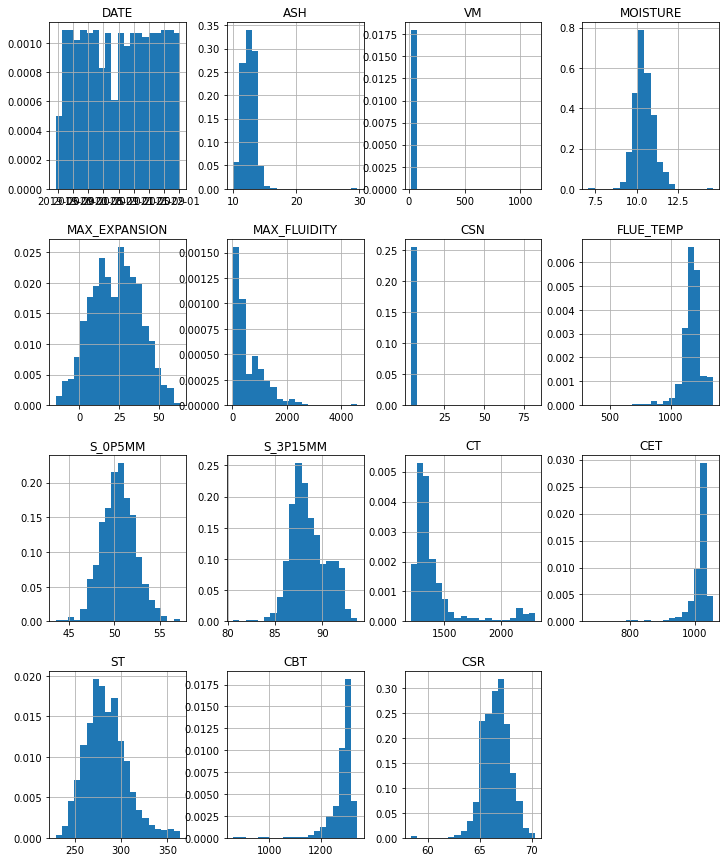

In [13]:
df.hist(bins=20, density=True, figsize=(12, 15))
plt.show()

In [14]:
for column in df.columns[1:]:
    print(column)
    print("0th percentile",np.percentile(df[column].dropna(), 0))
    print("5th percentile",np.percentile(df[column].dropna(), 5))
    print("10th percentile",np.percentile(df[column].dropna(), 10))
    print("50th percentile",np.percentile(df[column].dropna(), 50))
    print("90th percentile",np.percentile(df[column].dropna(), 90))
    print("95th percentile",np.percentile(df[column].dropna(), 95))
    print("98th percentile",np.percentile(df[column].dropna(),98))
    print("100th percentile",np.percentile(df[column].dropna(), 100))
    
    print("**"*10)

ASH
0th percentile 10.035
5th percentile 10.98566666666662
10th percentile 11.224666666666621
50th percentile 12.665
90th percentile 13.6033333333333
95th percentile 14.078
98th percentile 14.630999999999977
100th percentile 29.6966666666666
********************
VM
0th percentile 19.0366666666666
5th percentile 22.08
10th percentile 22.28599999999998
50th percentile 23.15
90th percentile 24.25866666666664
95th percentile 24.53766666666662
98th percentile 24.83199999999995
100th percentile 1131.635
********************
MOISTURE
0th percentile 7.1
5th percentile 9.6
10th percentile 9.761999999999999
50th percentile 10.4
90th percentile 11.2
95th percentile 11.5
98th percentile 11.8
100th percentile 14.5833333333333
********************
MAX_EXPANSION
0th percentile -15.0
5th percentile -2.0
10th percentile 3.0
50th percentile 23.0
90th percentile 42.89999999999998
95th percentile 47.0
98th percentile 52.77999999999997
100th percentile 63.0
********************
MAX_FLUIDITY
0th percentile 

In [ ]:
ASH
0th percentile 10.035
5th percentile 10.98566666666662
10th percentile 11.224666666666621
50th percentile 12.665
90th percentile 13.6033333333333
95th percentile 14.078
100th percentile 29.6966666666666
********************
VM
0th percentile 19.0366666666666
5th percentile 22.08
10th percentile 22.28599999999998
50th percentile 23.15
90th percentile 24.25866666666664
95th percentile 24.53766666666662
100th percentile 1131.635
********************
MOISTURE
0th percentile 7.1
5th percentile 9.6
10th percentile 9.761999999999999
50th percentile 10.4
90th percentile 11.2
95th percentile 11.5
100th percentile 14.5833333333333
********************
MAX_EXPANSION
0th percentile -15.0
5th percentile -2.0
10th percentile 3.0
50th percentile 23.0
90th percentile 42.89999999999998
95th percentile 47.0
100th percentile 63.0
********************
MAX_FLUIDITY
0th percentile 26.0
5th percentile 88.9
10th percentile 116.20000000000002
50th percentile 390.0
90th percentile 1352.3999999999999
95th percentile 1592.3999999999992
100th percentile 4608.0
********************
CSN
0th percentile 4.0
5th percentile 5.0
10th percentile 5.0
50th percentile 6.0
90th percentile 7.0
95th percentile 7.0
100th percentile 82.0
********************
FLUE_TEMP
0th percentile 327.467916666666
5th percentile 1049.961
10th percentile 1099.554458333328
50th percentile 1182.93416666666
90th percentile 1267.6248749999922
95th percentile 1296.97075
100th percentile 1342.26625
********************
S_0P5MM
0th percentile 43.498
5th percentile 47.46595
10th percentile 48.08654999999999
50th percentile 50.4678333333333
90th percentile 52.8553333333333
95th percentile 53.56149999999995
100th percentile 57.208
********************
S_3P15MM
0th percentile 80.5775999999999
5th percentile 85.9571333333333
10th percentile 86.4128
50th percentile 88.1946666666666
90th percentile 91.40853333333332
95th percentile 91.92759999999993
100th percentile 93.705
********************
CT
0th percentile 1206.3260050505
5th percentile 1236.10607462997
10th percentile 1259.13280467091
50th percentile 1331.50159204767
90th percentile 1597.86408743927
95th percentile 2138.47162069502
100th percentile 2294.83814872866
********************
CET
0th percentile 672.630377819549
5th percentile 954.206180555555
10th percentile 984.14273919753
50th percentile 1022.57898665261
90th percentile 1035.26614393939
95th percentile 1038.10058249497
100th percentile 1054.87006787909
********************
ST
0th percentile 229.04540842212
5th percentile 250.123758594346
10th percentile 257.479011143568
50th percentile 281.841724107843
90th percentile 311.991452991453
95th percentile 325.219357117626
100th percentile 363.342518881404
********************
CBT
0th percentile 859.35
5th percentile 1207.4916666666666
10th percentile 1234.0
50th percentile 1294.5416666666652
90th percentile 1316.83333333333
95th percentile 1322.2541666666666
100th percentile 1340.83333333333
********************
CSR
0th percentile 58.4
5th percentile 64.659
10th percentile 65.078
50th percentile 66.621
90th percentile 68.252
95th percentile 68.7
100th percentile 70.3
********************

COKING_HRS_ACT
0th percentile 64.8704024621212
5th percentile 67.25648338319665
10th percentile 68.28716066708515
50th percentile 73.2129511803376
90th percentile 83.95129254459306
95th percentile 89.09359928781232
100th percentile 140.144143794619
*********************************
SOLE_TEMP_QS_MIN
0th percentile 858.5
5th percentile 980.0
10th percentile 1013.5
50th percentile 1070.5
90th percentile 1106.0625
95th percentile 1112.96875
100th percentile 1177.75
*********************************
SOLE_TEMP_QS_MAX
0th percentile 1168.25
5th percentile 1355.46875
10th percentile 1374.0
50th percentile 1422.25
90th percentile 1455.3125
95th percentile 1464.46875
100th percentile 1492.625
******************************
PUSHING_R1
0th percentile 0.0
5th percentile 18.0
10th percentile 24.0
50th percentile 30.0
90th percentile 33.0
95th percentile 33.0
100th percentile 35.0
***********************
PUSHING_R2
0th percentile 0.0
5th percentile 17.35
10th percentile 23.0
50th percentile 30.0
90th percentile 32.0
95th percentile 33.0
100th percentile 34.0
********************
PUSHING_R3
0th percentile 0.0
5th percentile 18.0
10th percentile 23.0
50th percentile 29.0
90th percentile 33.0
95th percentile 33.0
100th percentile 36.0
********************
PUSHING_R4
0th percentile 0.0
5th percentile 18.0
10th percentile 23.0
50th percentile 30.0
90th percentile 32.0
95th percentile 33.0
100th percentile 35.0
**********************
BULK_DENSITY
0th percentile 1.0
5th percentile 1.02
10th percentile 1.02
50th percentile 1.04
90th percentile 1.07
95th percentile 1.08
100th percentile 10.5
********************
VM
0th percentile 12.26
5th percentile 22.19
10th percentile 22.4
50th percentile 23.14
90th percentile 23.84
95th percentile 24.018
100th percentile 24.65
********************
ASH
0th percentile 9.21
5th percentile 10.68
10th percentile 11.11
50th percentile 12.32
90th percentile 13.118000000000002
95th percentile 13.5
100th percentile 23022021.0
********************
CRUSHING_FINESS
0th percentile 59.92
5th percentile 84.2
10th percentile 84.5
50th percentile 85.28
90th percentile 85.936
95th percentile 86.24799999999999
100th percentile 87.79
********************

In [15]:
median = df.loc[df['ASH']<20, 'ASH'].median()
df.loc[df.ASH >= 20, 'ASH'] = np.nan
df.ASH.fillna(median,inplace=True)

In [12]:
median = df.loc[df['BULK_DENSITY']<2, 'BULK_DENSITY'].median()
df.loc[df.BULK_DENSITY >= 2, 'BULK_DENSITY'] = np.nan
df.BULK_DENSITY.fillna(median,inplace=True)

In [13]:
median = df.loc[df['CRUSHING_FINESS']>80, 'CRUSHING_FINESS'].median()
df.loc[df.CRUSHING_FINESS <= 80, 'CRUSHING_FINESS'] = np.nan
df.CRUSHING_FINESS.fillna(median,inplace=True)

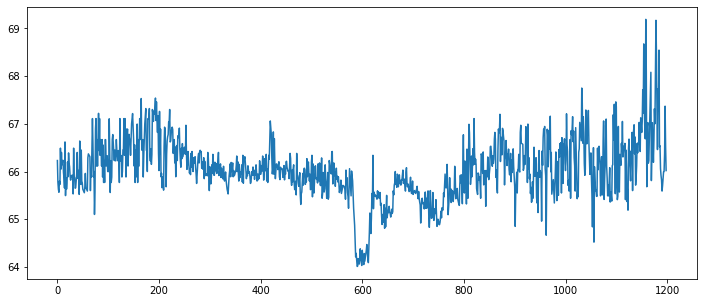

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['CSR'])
plt.show()

In [19]:
df.corr()

,COKING_HRS_ACT,OVEN_TOP_TEMP_MIN,OVEN_TOP_TEMP_MAX,SOLE_TEMP_PS_MIN,SOLE_TEMP_PS_MAX,SOLE_TEMP_QS_MIN,SOLE_TEMP_QS_MAX,PUSHING_R1,PUSHING_R2,PUSHING_R3,PUSHING_R4,BULK_DENSITY,VM,MOISTURE,ASH,CRUSHING_FINESS,CSN,CSR
COKING_HRS_ACT,1.000000,-0.508436,-0.801128,-0.537883,-0.838025,-0.555355,-0.821705,-0.590374,-0.616857,-0.554435,-0.567735,0.034646,0.186375,-0.083560,0.538528,0.118033,-0.048260,-0.500493
OVEN_TOP_TEMP_MIN,-0.508436,1.000000,0.501351,0.480240,0.358993,0.552303,0.355251,0.289407,0.320947,0.191946,0.310994,-0.091576,-0.252007,-0.177661,-0.143170,-0.121426,0.053050,0.323409
OVEN_TOP_TEMP_MAX,-0.801128,0.501351,1.000000,0.551229,0.802600,0.597513,0.807205,0.499522,0.503520,0.433774,0.477067,-0.172755,-0.182158,-0.083005,-0.500345,-0.158284,0.072233,0.470409
SOLE_TEMP_PS_MIN,-0.537883,0.480240,0.551229,1.000000,0.544412,0.600675,0.539601,0.263400,0.273801,0.275816,0.277504,-0.110863,-0.222253,-0.112105,-0.235103,-0.099324,0.070205,0.266542
SOLE_TEMP_PS_MAX,-0.838025,0.358993,0.802600,0.544412,1.000000,0.579816,0.942341,0.499480,0.512837,0.482873,0.465653,-0.065585,-0.161145,0.111135,-0.571937,-0.075439,0.044203,0.443336
SOLE_TEMP_QS_MIN,-0.555355,0.552303,0.597513,0.600675,0.579816,1.000000,0.563962,0.297198,0.314041,0.229653,0.333832,-0.086020,-0.191281,-0.087338,-0.242158,-0.126606,0.045514,0.291471
SOLE_TEMP_QS_MAX,-0.821705,0.355251,0.807205,0.539601,0.942341,0.563962,1.000000,0.490074,0.503038,0.493314,0.461354,-0.095225,-0.182922,0.091364,-0.577554,-0.089523,0.029949,0.462151
PUSHING_R1,-0.590374,0.289407,0.499522,0.263400,0.499480,0.297198,0.490074,1.000000,0.537913,0.281449,0.277372,-0.071262,-0.091821,-0.015359,-0.326823,-0.035893,0.043847,0.284163
PUSHING_R2,-0.616857,0.320947,0.503520,0.273801,0.512837,0.314041,0.503038,0.537913,1.000000,0.310569,0.324093,-0.057079,-0.081646,-0.003600,-0.355492,-0.030635,0.055484,0.346010
PUSHING_R3,-0.554435,0.191946,0.433774,0.275816,0.482873,0.229653,0.493314,0.281449,0.310569,1.000000,0.473180,-0.098233,-0.068913,0.014272,-0.338866,-0.028932,0.017816,0.245799


In [ ]:
SOLE_TEMP_QS_MAX

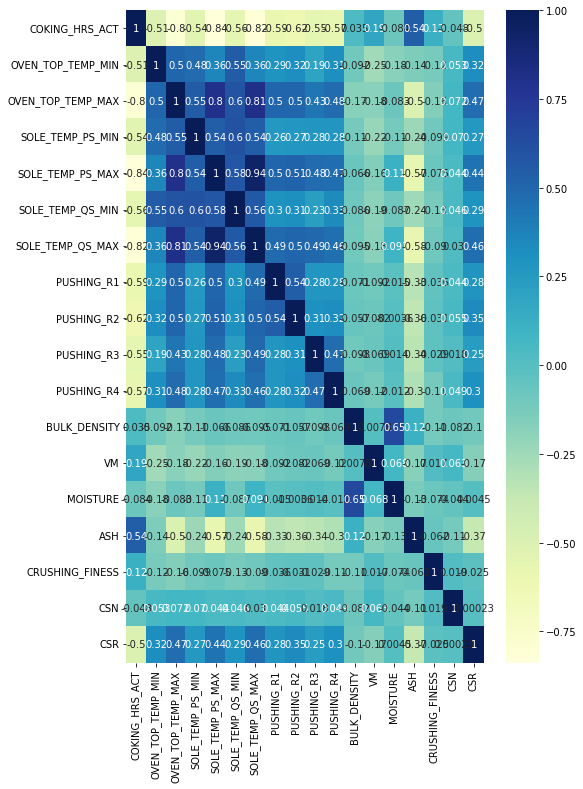

In [14]:
plt.figure(figsize=(8,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [15]:
def remove_correlated(df):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop features 
    
    return df.drop(to_drop, axis=1)


In [18]:
remove_correlated(df).columns

Index(['Date', 'COKING_HRS_ACT', 'OVEN_TOP_TEMP_MIN', 'OVEN_TOP_TEMP_MAX',
       'SOLE_TEMP_PS_MIN', 'SOLE_TEMP_PS_MAX', 'SOLE_TEMP_QS_MIN',
       'SOLE_TEMP_QS_MAX', 'PUSHING_R1', 'PUSHING_R2', 'PUSHING_R3',
       'PUSHING_R4', 'BULK_DENSITY', 'VM', 'MOISTURE', 'ASH',
       'CRUSHING_FINESS', 'CSN', 'CSR'],
      dtype='object')

In [33]:
window_size=180
test_period=30

In [34]:
df.fillna(df.median(),inplace=True)

<ipython-input-34-e1b8fa6d4ecf>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.median(),inplace=True)


In [35]:
train=df.iloc[-window_size-test_period:-test_period]
test=df.iloc[-test_period:]

In [36]:
print(train['Date'].min(),train['Date'].max())
print(test['Date'].min(),test['Date'].max())

2021-05-20 00:00:00 2021-11-27 00:00:00
2021-11-28 00:00:00 2022-01-02 00:00:00


In [37]:
X_train= train.drop(['Date', 'CSR'],axis=1)
y_train= train["CSR"]

data =[]
model_ols  = sm.OLS(y_train, X_train)
results_ols = model_ols .fit()
y_train_predicted_ols = results_ols.predict(X_train)
for i in range(len(test)):
    X_test= test.iloc[i].drop(['Date', 'CSR'])
    y_test= test['CSR'].iloc[i]
    # Predict for the ith data point
    y_test_pred =  results_ols.predict(X_test)
    # Store the results
    data.append([y_test, y_test_pred.values[0]])
    # Update training data
    y_train=y_train.append(pd.Series(y_test))
    X_train=X_train.append(X_test)
    #refresh the model after a day
    model_ols  = sm.OLS(y_train[-window_size:].values, X_train[-window_size:].values)
    results_ols = model_ols .fit()


<AxesSubplot:>

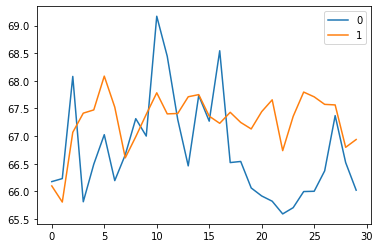

In [38]:
pd.DataFrame(data).plot()

In [41]:
pd.DataFrame(data)[0].values

array([66.175     , 66.23      , 68.08      , 65.81      , 66.49      ,
       67.025     , 66.19333333, 66.66      , 67.315     , 67.        ,
       69.17      , 68.445     , 67.3       , 66.46      , 67.735     ,
       67.27      , 68.545     , 66.52      , 66.54      , 66.06      ,
       65.915     , 65.82      , 65.59      , 65.70333333, 65.995     ,
       66.        , 66.37      , 67.37      , 66.52      , 66.02      ])

In [39]:
from sklearn.metrics import r2_score

In [42]:
r2_score(pd.DataFrame(data)[0].values,pd.DataFrame(data)[1].values)

-0.43026082172389635

In [ ]:
plt.plot(np.arange(len(y_oot)),y_oot,label="True")
plt.plot(np.arange(len(y_predict_oot)),y_predict_oot,label="Predicted")
plt.legend()
plt.show()